# Contact analysis: Q1 vs Q2

Here we calculate a Q1 vs Q2 plot, where Q1 refers to fraction of native contacts along a trajectory with reference to the first frame, and Q2 represents the fraction of native contacts with reference to the last.

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.20.1

**Packages required:**
    
* MDAnalysis [[1, 2]](#References)
* MDAnalysisTests
   
**Optional packages for molecular and data visualisation:**

* [matplotlib](https://matplotlib.org)
* [pandas](https://pandas.pydata.org)

<div class="alert alert-info">
    
**Note**

The `contacts.q1q2` function uses the `radius_cut_q` method to calculate the fraction of native contacts for a conformation by determining that atoms *i* and *j* are in contact if they are within a given radius [[3]](#References)

</div>

In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
from MDAnalysis.analysis import contacts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. [[4]](#References) The trajectory ``DCD`` samples a transition from a closed to an open conformation.

In [2]:
u = mda.Universe(PSF, DCD)

## Calculating Q1 vs Q2

We choose to calculate contacts for all the alpha-carbons in the protein, and define the contact radius cutoff at 8 Angstrom. `contacts.q1q2` returns a `contacts.Contacts` object, which we can run directly.

In [3]:
q1q2 = contacts.q1q2(u, 'name CA', radius=8).run()

The data is in `q1q2.timeseries`. The first column of the data is always the frame number.

In [7]:
q1q2_df = pd.DataFrame(q1q2.timeseries, 
                       columns=['Frame', 
                                'Q1', 
                                'Q2'])
q1q2_df.head()

,Frame,Q1,Q2
0,0.0,1.000000,0.946494
1,1.0,0.980926,0.949262
2,2.0,0.973660,0.952952
3,3.0,0.972752,0.951107
4,4.0,0.970027,0.948339


### Plotting

We can plot the fraction of native contacts over time.

Text(0, 0.5, 'Fraction of native contacts')

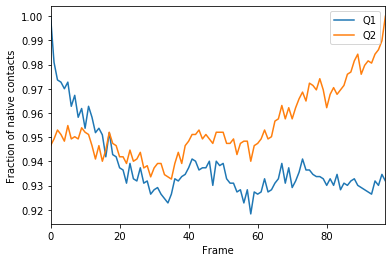

In [10]:
q1q2_df.plot(x='Frame')
plt.ylabel('Fraction of native contacts')

Alternatively, we can create a Q1 vs Q2 plot to characterise the transition of AdK from its opened to closed position. 

Text(0, 0.5, 'Q2')

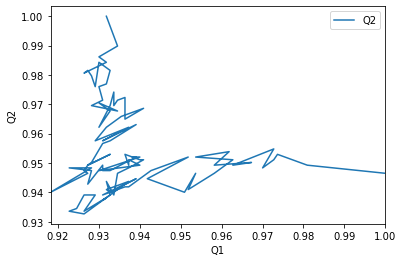

In [11]:
q1q2_df.plot(x='Q1', y='Q2')
plt.ylabel('Q2')

## References

[1]: R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. [MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations](http://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html). In S. Benthall and S. Rostrup, editors, *Proceedings of the 15th Python in Science Conference*, pages 98-105, Austin, TX, 2016. SciPy, [doi:10.25080/majora-629e541a-00e](https://doi.org/10.25080/majora-629e541a-00e).

[2]: N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. *J. Comput. Chem*. 32 (2011), 2319-2327, doi:[10.1002/jcc.21787](https://dx.doi.org/10.1002/jcc.21787). PMCID:[PMC3144279](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144279/)

[3]: Franklin, J., Koehl, P., Doniach, S., & Delarue, M. (2007).  MinActionPath: Maximum likelihood trajectory for large-scale structural transitions in a coarse-grained locally harmonic energy landscape.  *Nucleic Acids Research*, 35(SUPPL.2), 477–482. [doi:10.1093/nar/gkm342](http://doi.org/10.1093/nar/gkm342)

[4]: O. Beckstein, E.J. Denning, J.R. Perilla, T.B. Woolf. Zipping and unzipping of adenylate kinase: atomistic insights into the ensemble of open<-->closed transitions. *J Mol Biol*. 2009;394(1):160–176. [doi:10.1016/j.jmb.2009.09.009](https://dx.doi.org/10.1016%2Fj.jmb.2009.09.009)